In [207]:
import numpy as np
import tensorflow as tf

# 读取数据
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# 选取数据并归一化
X_train = X_train[:30000] / 255
X_test = X_test[:100] / 255

# 添加随机高斯噪声
X_train_ = X_train + 0.4 * np.random.normal(size=X_train.shape)
X_test_ = X_test + 0.4 * np.random.normal(size=X_test.shape)
X_train_noisy = np.clip(X_train_, 0, 1)
X_test_noisy = np.clip(X_test_, 0, 1)

X_train.shape, X_train_noisy.shape, X_test.shape, X_test_noisy.shape

((30000, 28, 28), (30000, 28, 28), (100, 28, 28), (100, 28, 28))

In [208]:
# 在 TensorFlow 中，tf.keras.layers.Conv2D 层期望输入的张量形状是 (N, H, W, C)

X_train_noisy_reshape = X_train_noisy.reshape(-1, 28, 28, 1)
X_train_reshape = X_train.reshape(-1, 28, 28, 1)
X_test_reshape = X_test.reshape(-1, 28, 28, 1).astype('float32')
X_test_noisy_reshape = X_test_noisy.reshape(-1, 28, 28, 1).astype('float32')
X_train_noisy_reshape.shape,X_train_reshape.shape,X_test_reshape.shape,X_test_noisy_reshape.shape

((30000, 28, 28, 1), (30000, 28, 28, 1), (100, 28, 28, 1), (100, 28, 28, 1))

In [186]:
input_layer = tf.keras.Input(shape=(28, 28, 1))
conv = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(
    input_layer
)
max_pool = tf.keras.layers.MaxPooling2D(padding="same")(conv)

# 解码器部分需要与池化层相反的上采样层
# 池化 === 降维，解码需要升维
up_samp = tf.keras.layers.UpSampling2D()(max_pool)
conv_2 = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(
    up_samp
)


model = tf.keras.models.Model(inputs=input_layer, outputs=conv_2)
model.compile(optimizer="Adam", loss="binary_crossentropy")
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# !! 数据形状不对
# model.fit(X_train, X_train, batch_size=64, epochs=10)

model.fit(X_train_noisy_reshape,X_train_reshape, batch_size=64, epochs=3)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3227
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1045
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0994


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


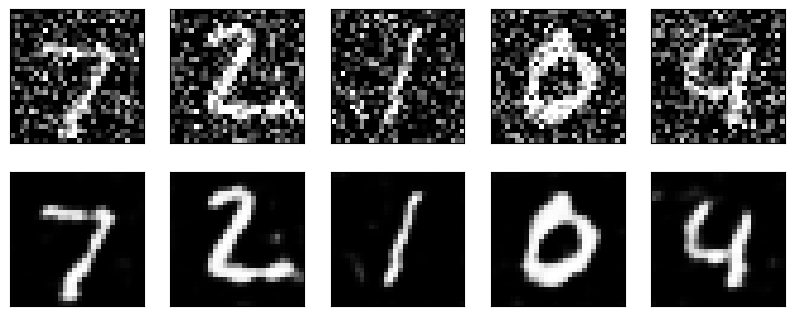

In [189]:
from matplotlib import pyplot as plt

n = 5
decoded_code = model.predict(X_test_noisy_reshape)  # 自动编码器推理
plt.figure(figsize=(10, 6))
for i in range(n):
    # 输出原始测试样本图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy_reshape[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 输出自动编码器重构后的图像
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_code[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# 使用 pytorch 实现

In [210]:
import torch

# 在 PyTorch 中，nn.Conv2d 层期望输入的张量形状是 (N, C, H, W)，其中：
# N 是批量大小。
# C 是通道数。
# H 是图像的高度。
# W 是图像的宽度。

X_train_py = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_test_py = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
X_train_noisy_py = torch.tensor(X_train_noisy, dtype=torch.float32).unsqueeze(1)
X_test_noisy_py = torch.tensor(X_test_noisy, dtype=torch.float32).unsqueeze(1)

X_train_py.shape,X_test_py.shape,X_train_noisy_py.shape,X_test_noisy_py.shape

(torch.Size([30000, 1, 28, 28]),
 torch.Size([100, 1, 28, 28]),
 torch.Size([30000, 1, 28, 28]),
 torch.Size([100, 1, 28, 28]))

In [201]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.c1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU())
        self.c2 = nn.Sequential(nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        self.c3 = nn.Sequential(nn.Upsample(scale_factor=2, mode="nearest"))
        self.c4 = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=3, padding=1), nn.Sigmoid()
        )

    def forward(self, x):
        r1 = self.c1(x)
        r2 = self.c2(r1)
        r3 = self.c3(r2)
        r4 = self.c4(r3)
        # print("r1:", r1.shape)
        # print("r2:", r2.shape)
        # print("r3:", r3.shape)
        # print("r4:", r4.shape)
        return r4


m = Model()
loss_fn = nn.BCELoss()
opt = torch.optim.Adam(m.parameters())
m

Model(
  (c1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (c2): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (c3): Sequential(
    (0): Upsample(scale_factor=2.0, mode='nearest')
  )
  (c4): Sequential(
    (0): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid()
  )
)

In [202]:
# X_train_noisy_reshape.shape,X_train_reshape.shape,X_test_reshape.shape,X_test_noisy_reshape.shape

train_loader = torch.utils.data.DataLoader(list(zip(X_train_noisy_py, X_train)), batch_size=64, shuffle=True)

In [203]:
num_epochs = 3
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, targets = data
        opt.zero_grad()
        outputs = m(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        opt.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/3], Loss: 0.1040
Epoch [2/3], Loss: 0.0986
Epoch [3/3], Loss: 0.1003


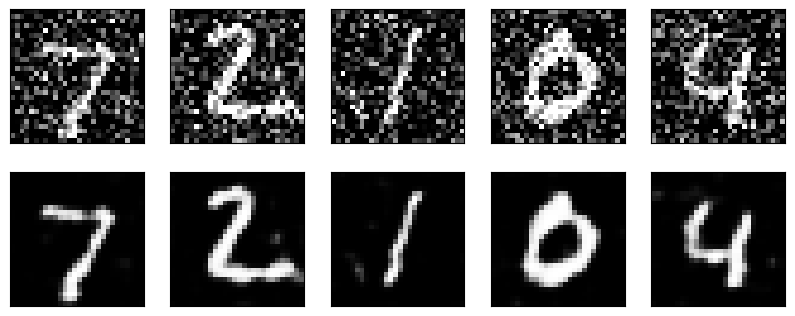

In [205]:
# 预测并展示结果
with torch.no_grad():
    decoded_code = m(X_test_noisy_py[:5])

n = 5
plt.figure(figsize=(10, 6))
for i in range(n):
    # 输出原始测试样本图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy_py[i].squeeze(), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 输出自动编码器重构后的图像
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_code[i].squeeze(), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()